In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

(1797, 64)


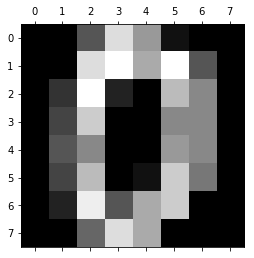

In [3]:
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

### Определите модель с наилучшим показателем метрики accuracy, используя различные модели и варьируя их параметры.

Что мы имеем:
Обучающиеся алгоритмы. Возьмем только изученные из пакета sklearn:

1. linear_model.SGDClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
2. ensemble.RandomForestClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
3. ensemble.BaggingClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
4. ensemble.ExtraTreesClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
5. ensemble.VotingClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
6. ensemble.AdaBoostClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
7. neighbors.KNeighborsClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
8. tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
9. tree.ExtraTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)

Теперь подготовим данные для обучения, для этого разобъем данные на обучающую и тестовую выборку

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)

Теперь надо подготовить разные наборы параметов для обучения, для этого для каждого алгоритма нужно прописать серию параметов которые мы будем менять. Начнем по порядку:

#### SGDClassifier
Основные параметры: 
- loss : str, default: ‘hinge’
Функция потерь
Возможные параметры для классификации: 

1. ‘hinge’ - кусочно-линейная функция потерь (или hinge loss). Которая зануляется на тех объектах, которые достаточно далеко от разделяющей поверхности
2. ‘log’ - $$\large logloss = - \frac{1}{l} \cdot \sum_{i=1}^l (y_i \cdot log(\hat y_i) + (1 - y_i) \cdot log(1 - \hat y_i))$$  

можно представить минимизацию logloss как задачу максимизации accuracy путем штрафа за неверные предсказания. Однако необходимо отметить, что logloss крайне сильно штрафует за уверенность классификатора в неверном ответе.

3. ‘modified\_huber’ - Функция потерь Хьюбера — это функция потерь, используемая в устойчивой регрессии, которая менее чувствительна к выбросам, чем квадратичная ошибка. ( https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%A5%D1%8C%D1%8E%D0%B1%D0%B5%D1%80%D0%B0 )
4. ‘squared_hinge’ - квадратичная функция потерь
5. ‘perceptron’ - ХЗ что это за функция такая


- penalty : str,
Нормализация, т.е. штраф за выбросы
Возможные параметры:
‘none’, ‘l2’, ‘l1’, ‘elasticnet’

- alpha : float

Мультипликатор/множитель регуляризации. По умолчанию 0.0001 Так же используется для learning_rate когда он задан как ‘optimal’.

- max_iter : int, optional

Максимальное кол-во проходов по тренировочным данным 

- tol : float or None, optional

Критерий остановки. Если None то остановка произойдет при условии (loss > previous_loss - tol)

- shuffle : bool, optional

Будут ли перемешаны данные после каждой эпохи/прохода. Defaults to True.

- epsilon : float

Указывает на интенсивность действия функции потерь. Только для функций потерь ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’. Для «huber» определяет порог, при котором становится менее важным получить правильное предсказание. Для эпсилон-чувствительности любые различия между текущим прогнозом и правильной меткой игнорируются, если они меньше этого порога.

- learning_rate : string, optional

Тип скорости обучения. 
Возможные значения:
‘constant’: eta = eta0
‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
‘invscaling’: eta = eta0 / pow(t, power_t)

- eta0 : double

Начальная скорость обучения для типов скорости обучения «constant» или «invscaling». Значение по умолчанию равно 0.0, так как eta0 не используется в типе по умолчанию ‘optimal’

- class_weight : dict, {class_label: weight} or “balanced” or None, optional

Предустановлен для параметра fit_weight. Веса, связанные с классами. Если не указано, все классы должны иметь вес один. «balanced» режим использует значения y для автоматической регулировки весов, обратно пропорциональных частотам класса во входных данных, как  n_samples / (n_classes * np.bincount(y))



